<a href="https://colab.research.google.com/github/priyeshroy10155/Deep-learning-projects/blob/main/RNN_Real_Time_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#df

In [5]:
#df.info()

In [6]:
df=pd.read_csv('/content/drive/MyDrive/DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [7]:
df.columns=['sales']

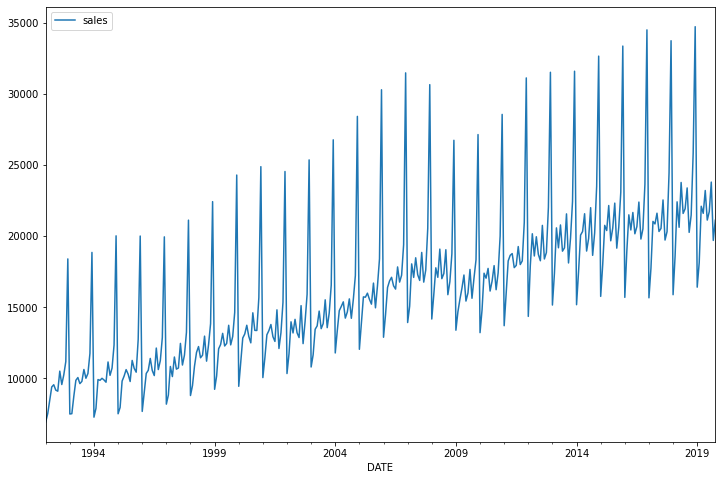

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

334

In [10]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [11]:
len(df)-18

316

In [12]:
test_size=18
test_ind=len(df)-test_size

In [13]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [14]:
train

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [15]:
test

,sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train=scaler.transform(train)

In [20]:
scaled_test=scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
len(test)

18

In [23]:
length=12
generator=TimeseriesGenerator(scaled_train,
                              scaled_train,length=length,batch_size=1)

In [24]:
x,y=generator[0]

In [25]:
x

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [26]:
y

array([[0.02047633]])

In [27]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,LSTM

In [30]:
n_feature=1

In [31]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [35]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [36]:
model.fit_generator(generator,epochs=20,
                     validation_data=validation_generator,
                     callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


304/304 [==============================] - 10s 22ms/step - loss: 0.0262 - val_loss: 0.0034
Epoch 2/20
304/304 [==============================] - 6s 21ms/step - loss: 0.0198 - val_loss: 0.0087
Epoch 3/20
304/304 [==============================] - 6s 20ms/step - loss: 0.0159 - val_loss: 0.0079


In [37]:
losses=pd.DataFrame(model.history.history)

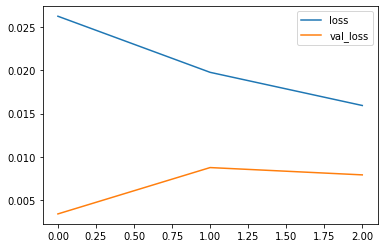

In [38]:
losses.plot()

In [39]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_feature))
for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [40]:
true_predictions=scaler.inverse_transform(test_predictions)

In [41]:
test['Predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
test

,sales,Predictions
DATE,,
2018-05-01,23764,22630.537602
2018-06-01,21589,22325.828740
2018-07-01,21919,22725.325699
2018-08-01,23381,23655.538156
2018-09-01,20260,22874.596923
2018-10-01,21473,24162.707670
2018-11-01,25831,28880.172187
2018-12-01,34706,31254.346750
2019-01-01,16410,22085.988717


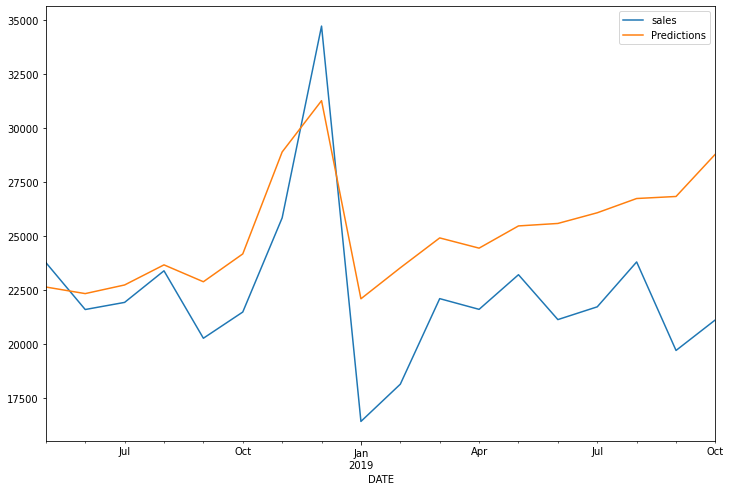

In [43]:
test.plot(figsize=(12,8))

In [44]:
full_scalar=MinMaxScaler()
scaled_full_data=full_scalar.fit_transform(df)

In [45]:
length=12
genarator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,batch_size=1)

In [46]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=8)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


304/304 [==============================] - 7s 20ms/step - loss: 0.0256
Epoch 2/8
304/304 [==============================] - 6s 20ms/step - loss: 0.0161
Epoch 3/8
304/304 [==============================] - 6s 20ms/step - loss: 0.0086
Epoch 4/8
304/304 [==============================] - 6s 21ms/step - loss: 0.0050
Epoch 5/8
304/304 [==============================] - 6s 20ms/step - loss: 0.0028
Epoch 6/8
304/304 [==============================] - 10s 32ms/step - loss: 0.0025
Epoch 7/8
304/304 [==============================] - 12s 40ms/step - loss: 0.0017
Epoch 8/8
304/304 [==============================] - 6s 20ms/step - loss: 0.0027


In [47]:
forecast=[]
periods=12
first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape((1,length,n_feature))
for i in range(periods):
  current_pred=model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [48]:
forecast=scaler.inverse_transform(forecast)

In [49]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [50]:
forecast

array([[25531.52522087],
       [35071.26359749],
       [17481.03745389],
       [18781.70923209],
       [21931.90880585],
       [21552.9222331 ],
       [22940.23902702],
       [21218.26127768],
       [21739.10000467],
       [23517.83142138],
       [20217.94936514],
       [21353.5858326 ]])

In [51]:
forecast_index=pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [52]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [53]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [54]:
forecast_df

,Forecast
2019-11-01,25531.525221
2019-12-01,35071.263597
2020-01-01,17481.037454
2020-02-01,18781.709232
2020-03-01,21931.908806
2020-04-01,21552.922233
2020-05-01,22940.239027
2020-06-01,21218.261278
2020-07-01,21739.100005
2020-08-01,23517.831421


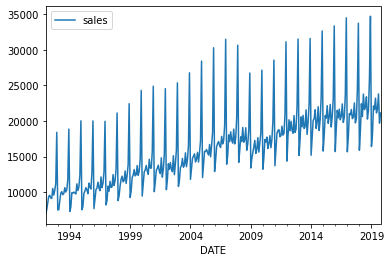

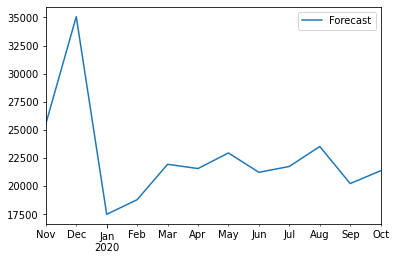

In [55]:
df.plot()
forecast_df.plot()

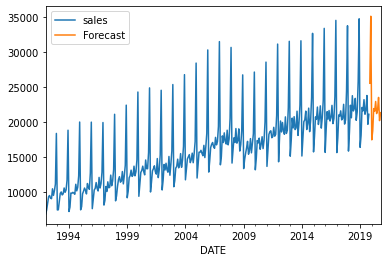

In [56]:
ax=df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

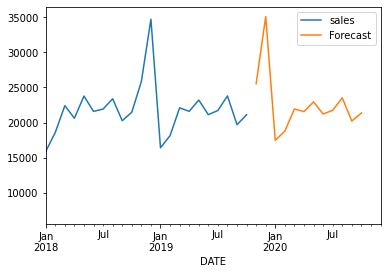

In [57]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')